In [66]:
import numpy as np
import matplotlib.pyplot as plt

In [67]:
def const_acc(ac,v0,s0,t):
    v1 = v0 + ac*t
    s1 = s0 + v0*t + 1/2*ac*t**2 
    return s1, v1

In [68]:
def const_jerk(jc, a0, v0, s0, tj):
    a1 = a0 + jc*tj
    v1 = v0 + a0*tj + 1/2*jc*tj**2
    s1 = s0 + v0*tj + 1/2*a0*tj**2 + 1/6*jc*tj**3
    return s1, v1, a1

In [69]:
# max values
vmax = 12
amax = 10
tj = 1000e-3

# initial values
s0 = 0
v0 = vmax
a0 = 0
jc = amax/tj

t_const = vmax/amax - tj

if amax**2/jc <= vmax:
    bAcc_const = True
else:
    bAcc_const = False

if bAcc_const:
    t1 = np.sqrt(vmax/jc)
    print('time to acc when no const acc phase is present', t1, 's')
    print('total time to stop: ', 2*t1, 's')
else:
    print('time with constant acc: ', t_const, 's')
    print('total time to stop: ', t_const + 2*tj, 's')
    


time to acc when no const acc phase is present 1.0954451150103321 s
total time to stop:  2.1908902300206643 s


In [70]:
# calculation of breaking distance

if bAcc_const:
    # ramp 1 to -amax
    s1, v1, a1 = const_jerk(-jc,a0,v0,s0,tj)

    # const acc phase
    s2, v2 = const_acc(a1,v1,s1,t_const)

    # ramp 2 to v=0, a=0
    s3, v3, a3 = const_jerk(jc,a1,v2,s2,tj)

else:
    # ramp 1 to -amax
    s1, v1, a1 = const_jerk(-jc,a0,v0,s0,t1)

    # ramp 2 to v=0, a=0
    s2, v2, a2 = const_jerk(jc,a1,v1,s1,t1)
    

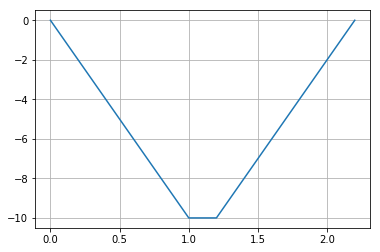

In [71]:
if bAcc_const:
    t_vec = [0,tj,tj+t_const,2*tj+t_const]
    a_vec = [a0,a1,a1,a3]
else:
    t_vec = [0,t1,2*t1]
    a_vec = [a0,a1,a2]

plt.plot(t_vec,a_vec)
plt.grid()

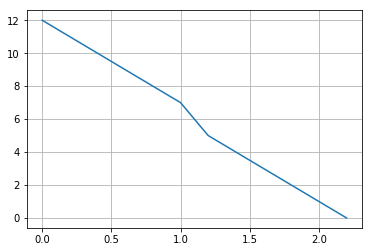

In [72]:
if bAcc_const:
    v_vec = [v0,v1,v2,v3]
else:
    v_vec = [v0,v1,v2]

plt.plot(t_vec, v_vec)
plt.grid()

Total distance to stop:  13.200000000000001 m


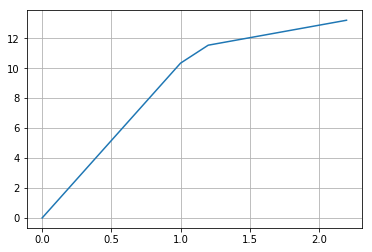

In [73]:
if bAcc_const:
    s_vec = [s0,s1,s2,s3]
    print('Total distance to stop: ', s3, 'm')
else:
    s_vec = [s0,s1,s2]
    print('Total distance to stop: ', s2, 'm')

plt.plot(t_vec, s_vec)
plt.grid()